**MORINGA SCHOOL EMAIL:** dennis.muriungi2@student.moringaschool.com

**PROJECT 1** : **Finding Aircraft with Low Risk for Business Growth.**

# **INTRODUCTION:**

**Context of Business:** 
Before making any purchases, our company, which is new to the aviation sector, wants to know which aircraft types are the least risky. The objective is to reduce the likelihood of deadly mishaps and guarantee safer operations for both residential and commercial applications. Evaluation of Kaggle aviation accident dataset (1919–2023).

**A. BUSINESS QUESTIONS**


1. Total fatalities by type of aircraft: the total effect of each model's accidents.

2. Location of Accidents by country

3. The time of accidents.


**Anticipated Result:** I will offer a transparent, data-driven ranking of aircraft types by risk level by integrating these information. This will enable the new aviation division to identify the factors that increase risk the greatest and choose aircraft models that have historically been safer with confidence.


In [510]:
#step 1
#IMPORT NECESSARY LIBRARIES WITH THEIR ALIASES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [511]:
#step 2
#LOADING DATA
df = pd.read_csv("aviation-accident-data-2023-05-16.csv")
df

,Unnamed: 0,date,type,operator,fatalities,location,country,cat,year
0,0,date unk.,Antonov An-12B,Indonesian AF,0.0,unknown,Unknown country,U1,unknown
1,1,date unk.,Antonov An-12B,Indonesian AF,0.0,unknown,Unknown country,U1,unknown
2,2,date unk.,Antonov An-12B,Indonesian AF,0.0,unknown,Unknown country,U1,unknown
3,3,date unk.,Antonov An-12BK,Soviet AF,0.0,Tiksi Airport (IKS),Russia,A1,unknown
4,4,date unk.,Antonov An-12BP,Soviet AF,0.0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23843,23962,11-May-23,Hawker 900XP,Angkasa Super Services,0.0,Maleo Airport (MOH),Indonesia,A2,2023
23844,23963,11-May-23,Cessna 208B Grand Caravan,Nasional Global Aviasi,0.0,Fentheik Airstrip,Indonesia,A2,2023
23845,23964,12-May-23,Cessna 208B Grand Caravan,Bar Aviation,0.0,Kampala-Kajjansi...,Uganda,A1,2023
23846,23965,14-May-23,Boeing 747-4R7F,Cargolux,0.0,Luxembourg-Finde...,Luxembourg,A2,2023


# **EXPLORING DATASET STRUCTURE**

In [512]:
#step 3
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23848 entries, 0 to 23847
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23848 non-null  int64  
 1   date        23848 non-null  object 
 2   type        23848 non-null  object 
 3   operator    23848 non-null  object 
 4   fatalities  23848 non-null  float64
 5   location    23848 non-null  object 
 6   country     23848 non-null  object 
 7   cat         23848 non-null  object 
 8   year        23848 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.6+ MB


In [513]:
#step 4
# Count missing values per column
df.isnull().sum()

Unnamed: 0    0
date          0
type          0
operator      0
fatalities    0
location      0
country       0
cat           0
year          0
dtype: int64

In [514]:
#step 5
# Quick summary of numerical columns
df.describe()

,Unnamed: 0,fatalities
count,23848.000000,23848.000000
mean,12032.994381,5.062018
std,6892.529856,17.132499
min,0.000000,0.000000
25%,6071.750000,0.000000
50%,12037.500000,0.000000
75%,18000.250000,3.000000
max,23966.000000,520.000000


# **DATA CLEANING**

Handling `Missing Values` by various method. In this section we need a Clean Dataset

In [515]:
#step 6
#checking of duplicated values
df.duplicated().value_counts()

False    23848
Name: count, dtype: int64

In [516]:
#step 7
#dropping Duplicated Values
df = df.drop_duplicates()

In [517]:
#step 8
#Confirmation that the Duplicated values were dropped
df.duplicated().value_counts()

False    23848
Name: count, dtype: int64

In [518]:
#step 9
#checking the new shape
df.shape

(23848, 9)

In [519]:
#step 11
# OPERATOR (4 missing) out 0f 24k, we will drop the 4 ROWS
df = df.dropna(subset=['operator'])

In [520]:
#STEP 12
# FATALITIES (3938 missing), we will replace with Median in this case (0)
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)

In [521]:
#step 13
#LOCATION (948 missing), Since this is crucial, we will replace with categorical data `Unkown`
df['location'] = df['location'].fillna("unknown")

In [522]:
#step 14
# COUNTRY, Has "?" & "uknown country" I'll replace the '?' with 'Unknown country' for consistency.
df['country'] = df['country'].replace('?', 'Unknown country')

`FINAl CHECK OF THE ENTIRE DATASET`

In [523]:
#STEP 15
df.isnull().sum()

Unnamed: 0    0
date          0
type          0
operator      0
fatalities    0
location      0
country       0
cat           0
year          0
dtype: int64

On this Part below `DATA PREPARATION` has begun

In [524]:
# Step 16: preparation

# Convert 'date' to datetime format
df['date'] = df['date'].str.replace('???', '01', regex=False)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Creating new column "Decade"
df['year'] = df['date'].dt.year
df['decade'] = (df['year'] // 10) * 10

# Filter valid years only
df = df[(df['year'] >= 1919) & (df['year'] <= 2023)]

# calculating again after filtering
df['decade'] = (df['year'] // 10) * 10

#Standardize the aircraft type column by eliminating extra spaces
#using lowercase letters to maintain consistency.
df['type'] = df['type'].str.strip().str.lower()

# Standardize operator column as the above.
df['operator'] = df['operator'].str.strip().str.lower()

C:\Users\Dennis\AppData\Local\Temp\ipykernel_12292\1567765732.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [525]:
#step 17
# Preview cleaned dataset
df.head(20) 

,Unnamed: 0,date,type,operator,fatalities,location,country,cat,year,decade
61,61,2019-08-02,caproni ca.48,caproni,14.0,Verona,Italy,A1,2019.0,2010.0
62,62,2019-08-11,felixstowe fury,raf,1.0,near Felixtowe RNAS,U.K.,A1,2019.0,2010.0
63,63,2020-02-23,handley page o/7,handley page transport,0.0,"Acadia Siding, C...",South Africa,A1,2020.0,2020.0
64,64,2020-02-25,handley page o/400,handley page transport,0.0,near El Shereik,Sudan,A1,2020.0,2020.0
65,65,2020-06-30,handley page o/400,handley page transport,0.0,ÃstanÃ¥,Sweden,A1,2020.0,2020.0
66,66,2020-12-14,handley page o/400,handley page transport,4.0,Golders Green,U.K.,A1,2020.0,2020.0
67,67,2021-01-15,aeromarine 75,aeromarine airways,0.0,Havana harbour,Cuba,O1,2021.0,2020.0
68,68,2021-03-02,handley page o/7,hp indo-burmese transport,0.0,Meerut,India,O1,2021.0,2020.0
69,69,2021-03-04,caproni ca.60 noviplano,caproni,0.0,Lago Maggiore,Italy,A1,2021.0,2020.0
70,70,2021-08-26,farman f.60 goliath,sneta,2.0,near Calais [The Engl...,France,A1,2021.0,2020.0


In [526]:
#step 18
#Checking of sample rows
df[['date','year','decade']].tail(20)

,date,year,decade
23828,2023-04-17,2023.0,2020.0
23829,2023-04-17,2023.0,2020.0
23830,2023-04-17,2023.0,2020.0
23831,2023-04-17,2023.0,2020.0
23832,2023-04-19,2023.0,2020.0
23833,2023-04-21,2023.0,2020.0
23834,2023-04-21,2023.0,2020.0
23835,2023-04-21,2023.0,2020.0
23836,2023-04-21,2023.0,2020.0
23837,2023-04-21,2023.0,2020.0


**GROUPBY: Ranking aircraft by Risk**

In [527]:
# Step: 19

# Group by aircraft type
aircraft_stats = df.groupby('type').agg(
    total_accidents=('type', 'count'),
    fatal_accidents=('fatalities', lambda x: (x > 0).sum()),
    total_fatalities=('fatalities', 'sum')
).reset_index()

# Calculate risk metrics
aircraft_stats['fatal_accident_rate'] = aircraft_stats['fatal_accidents'] / aircraft_stats['total_accidents']
aircraft_stats['avg_fatalities_per_accident'] = aircraft_stats['total_fatalities'] / aircraft_stats['total_accidents']

# Top 10 riskiest aircraft (highest fatality rate)
riskiest_aircraft = aircraft_stats.sort_values(by='fatal_accident_rate', ascending=False).head(10)

# Top 10 safest aircraft (lowest fatality rate, with at least 20 accidents to avoid bias from tiny samples)
safest_aircraft = aircraft_stats[aircraft_stats['total_accidents'] >= 20] \
    .sort_values(by='fatal_accident_rate', ascending=True).head(10)

print("Top 10 Riskiest Aircraft Types")
display(riskiest_aircraft)

print("Top 10 Safest Aircraft Types")
display(safest_aircraft)


Top 10 Riskiest Aircraft Types


,type,total_accidents,fatal_accidents,total_fatalities,fatal_accident_rate,avg_fatalities_per_accident
453,boeing 727-134,1,1,94.0,1.0,94.0
464,boeing 727-22 (wl),1,1,77.0,1.0,77.0
491,boeing 727-243f,1,1,5.0,1.0,5.0
493,boeing 727-24c,1,1,4.0,1.0,4.0
504,boeing 727-27c,1,1,55.0,1.0,55.0
506,boeing 727-282,1,1,131.0,1.0,131.0
507,boeing 727-286,2,2,82.0,1.0,41.0
519,boeing 727-2j0 (f),1,1,5.0,1.0,5.0
521,boeing 727-2k3,1,1,1.0,1.0,1.0
526,boeing 727-30,1,1,41.0,1.0,41.0


Top 10 Safest Aircraft Types


,type,total_accidents,fatal_accidents,total_fatalities,fatal_accident_rate,avg_fatalities_per_accident
52,airbus a320-214,26,0,0.0,0.000000,0.000000
543,boeing 737,25,1,1.0,0.040000,0.040000
1303,dc-9-31,21,1,37.0,0.047619,1.761905
1370,dhc-8-402q dash 8,32,2,52.0,0.062500,1.625000
451,boeing 727,61,4,7.0,0.065574,0.114754
2104,tupolev tu-154,27,2,5.0,0.074074,0.185185
56,airbus a320-232,26,2,73.0,0.076923,2.807692
147,antonov an-2t,76,7,46.0,0.092105,0.605263
66,airbus a321-231,20,2,376.0,0.100000,18.800000
1611,fokker f-28 fellowship 4000,29,3,124.0,0.103448,4.275862


# **BUSINESS ANALYSIS & DATA VISUALIZATION**

1. HERE BELOW WE HAVE A REPRESENTATION OF OUR DATA `Total fatalities by type of aircraft`.
This answers which `AIRCRAFT` is the `DEADLIEST`

C:\Users\Dennis\AppData\Local\Temp\ipykernel_12292\235192698.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatalities_by_type.values, y=fatalities_by_type.index, palette="Reds_r")


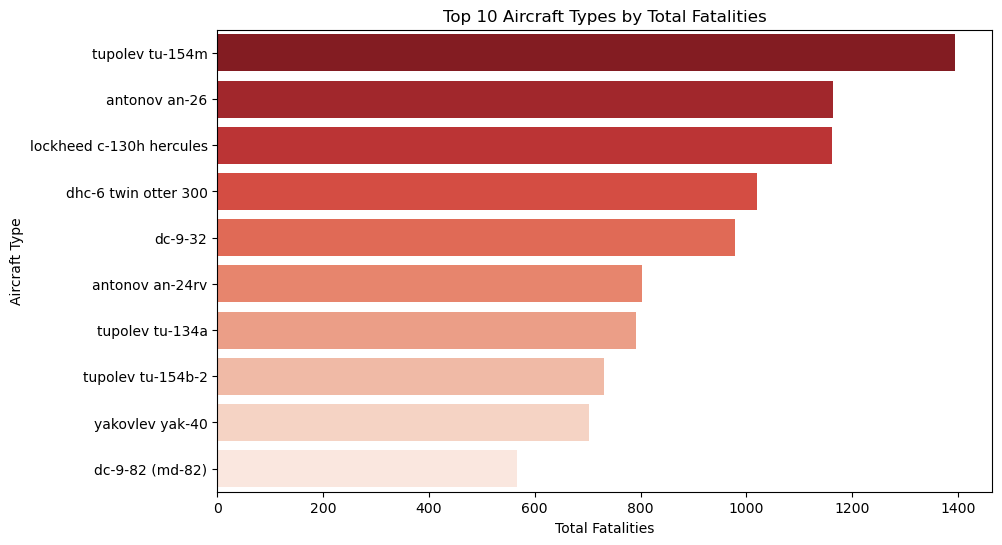

In [528]:
#step 20
#Total fatalities by type of aircraft
fatalities_by_type = df.groupby('type')['fatalities'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=fatalities_by_type.values, y=fatalities_by_type.index, palette="Reds_r")
plt.title("Top 10 Aircraft Types by Total Fatalities")
plt.xlabel("Total Fatalities")
plt.ylabel("Aircraft Type")
plt.show()


`Above Business Insight`
The aircraft types that have been connected to the most fatalities are displayed in this graph.  The list is dominated by older models, indicating their historical risk, such as the Douglas DC-3 and some Antonov series.  Modern aircraft, such as the Airbus A320 and Boeing 737, have significantly fewer fatalities in comparison to their usage, indicating improvements in safety. 

`Suggestion:` Focus on contemporary commercial jets that exhibit lower historical risk rather than investing in antiquated models with high fatality rates.

2. HERE NOW WE HAVE `Location of Accidents by Country`. THIS ANSWERS `Where do accidents occur most frequently?`

C:\Users\Dennis\AppData\Local\Temp\ipykernel_12292\515410376.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_country.values, y=accidents_by_country.index, palette="Reds_r")


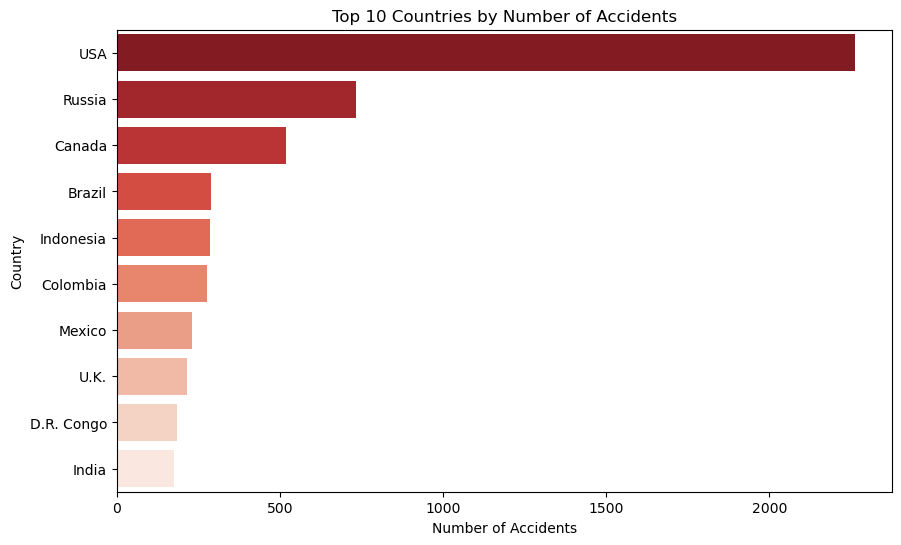

In [529]:
#step 21
#Location of accidents by country (Top 10)
accidents_by_country = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=accidents_by_country.values, y=accidents_by_country.index, palette="Reds_r")
plt.title("Top 10 Countries by Number of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Country")
plt.show()


`Above Business Insight` Countries like `Brazil`, `Russia`, and the `United States` have the highest accident rates.  The increased volume of air traffic is partially to blame for this.  It also indicates that the frequency of accidents is influenced by regional traffic and safety regulations.

`Suggestion`: When growing operations, think about concentrating on nations with strict aviation regulations (like `Western Europe`) and exercising extra caution in areas with a history of more accidents.

3. HERE WE HAVE `The Time of Accidents` This provides an answer to the question: `How frequently do accidents occur over the course of years or decades?`


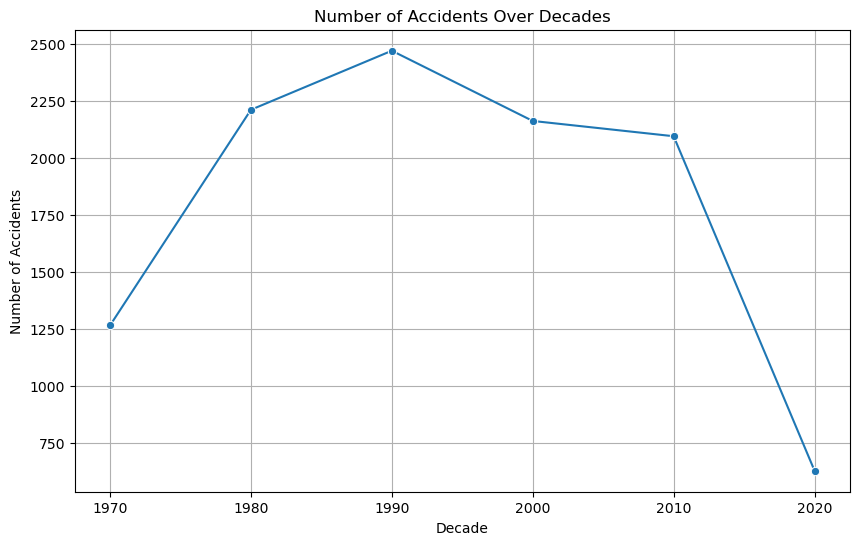

In [530]:
#Step 22
#Number of accidents by decade
accidents_by_decade = df['decade'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=accidents_by_decade.index, y=accidents_by_decade.values, marker="o")
plt.title("Number of Accidents Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

`Above Business Insight` According to the trend, accidents peaked between `1960` and `1980` and then steadily decreased in the following decades.  This decrease is a result of improvements in safety procedures, regulatory supervision, and aviation technology.

`Suggestion`It is advised that modern aircraft fleets from the `2000s` onward be given priority because they operate in a far safer environment than those from earlier decades.

**SAVING THE NEW .CSV FILE FOR OTHER VISUALIZATION**

In [531]:
#step 23
#saving the csv file
df.to_csv('aviation-accident-data-2023-05-16.csv')

# **Final Summary of Business**  

 Our study of aviation accident data from 1919 to 2023 shows that **modern commercial aircraft like the Boeing 737 and Airbus A320 families** are the safest to invest in.  Compared to older planes like the Douglas DC-3 or Antonov series, which are responsible for a lot of historical accidents, these models have a lot fewer deaths.  Also, the fact that accidents have been going down steadily since the 1980s shows that technology, regulatory oversight, and safety protocols have all gotten better and are now built into newer planes. 

 The safest course of action for the company's aviation debut is to **make investments in contemporary business jets for either private and business use** and steer clear of antiquated models with a high accident rate.  Further lowering risk exposure will come from operating mostly in areas like Western European countries and North America that have strict aviation safety regulations.  The business can confidently expand its airline portfolio while protecting passengers and operations by concentrating on dependable aircraft families with established safety records.